# Heart Disease UCI Prediction & Diagnosis

## Dataset by Heart Disease UCI
* https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Dataset Description
The Heart Disease dataset is a multivariate dataset containing 76 attributes, but most published experiments refer to using a subset of 14 of these attributes. It is focused on diagnosing the presence of heart disease in patients based on various clinical features.

# The key attributes used are:

* Age (age in years)

* Sex (1 = male, 0 = female)

* CP (chest pain type)

* Trestbps (resting blood pressure in mm Hg)

* Chol (serum cholesterol in mg/dl)

* FBS (fasting blood sugar > 120 mg/dl, 1=true, 0=false)

* Restecg (resting electrocardiographic results)

* Thalach (maximum heart rate achieved)

* Exang (exercise induced angina, 1=yes, 0=no)

* Oldpeak (ST depression induced by exercise relative to rest)

* Slope (the slope of the peak exercise ST segment)

* CA (number of major vessels colored by fluoroscopy, 0-3)

* Thal (3=normal, 6=fixed defect, 7=reversable defect)

* Target (diagnosis of heart disease, 0=no, 1=yes)

The "goal" field or target variable refers to the presence of heart disease, with values 0 (no disease) to 4. Most studies simplify this to a binary 0 or 1 classification.

The dataset aims to predict whether a patient has heart disease based on the given clinical attributes. It can also be used for exploratory analysis to gain insights into factors related to heart disease diagnosis and prevalence.


## Project Structure

The project consists of several sections:

**Data Import and Description:** The project imports the necessary libraries and loads the dataset from an S3 bucket. The dataset is then described, and its columns are explained.

**Data Analysis:** The project performs exploratory data analysis, including data visualization, feature selection, and feature importance analysis.

**Data Visualization:** The project visualizes the data using various plots, including count plots, heatmaps, and dist plots, to gain insights into the relationships between the attributes and the target variable.

**Machine Learning:** The project trains several machine learning models, including logistic regression, decision trees, random forests, support vector machines, and gradient boosting, to predict the presence of heart disease.

**Model Evaluation:** The project evaluates the performance of each machine learning model using metrics such as accuracy, precision, recall, and F1 score.

**Model Selection:** The project selects the best-performing machine learning model based on the evaluation metrics.
Deployment: The project deploys the selected model in a production-ready environment.

# Aims and Objectives

## 1. Explotary Data Analysis (EDA):

## 2. Data Preprocessing:

## 3. Clasification Models:

## Table of Contents

## Imports and Reading the dataset

In [4]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.metrics import roc_auc_score, classification_report, f1_score, average_precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

df = pd.read_csv('/content/heart.csv')

%matplotlib inline

In [5]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

## Data Description
### Column headers

age: The patient's age in years

sex: The patient's gender (1 = male, 0 = female)

cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

trestbps: Resting blood pressure in mm Hg on admission to the hospital

chol: Serum cholesterol level in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave

abnormality, 2 = left ventricular hypertrophy)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

ca: Number of major vessels colored by fluoroscopy (0-3)

thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)

target: Diagnosis of heart disease (0 = no disease, 1 = disease present)

### Description

Here are some further key points to consider

cp:

0 = asymptomatic

1 = atypical angina

2 = non-anginal pain

3 = typical angina

restecg:

0 = showing probable or definite left ventricular hypertrophy

1 = normal

2 = having ST-T wave abnormality

slope:

0 = downsloping

1 = flat

2 = upsloping

thal (results of blood flow from radioactive dye):

0 = NULL (dropped previously)

1 = fixed defect (no blood flow in some part)

2 = normal blood flow

3 = reversible defect

target (diagnosis):

0 = disease present

1 = no disease

Other important notes:

Instances with ca=4 (93, 139, 164, 165, 252) and thal=0 (49, 282) should be removed as they are incorrect/NaN in original dataset.

thal refers to Thalium radioactive tracer injected during stress test to check blood flow.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [9]:
print(df.shape)

(303, 14)


Checking for null values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: title={'center': 'Finding Null Values Using Heatmap\n'}>

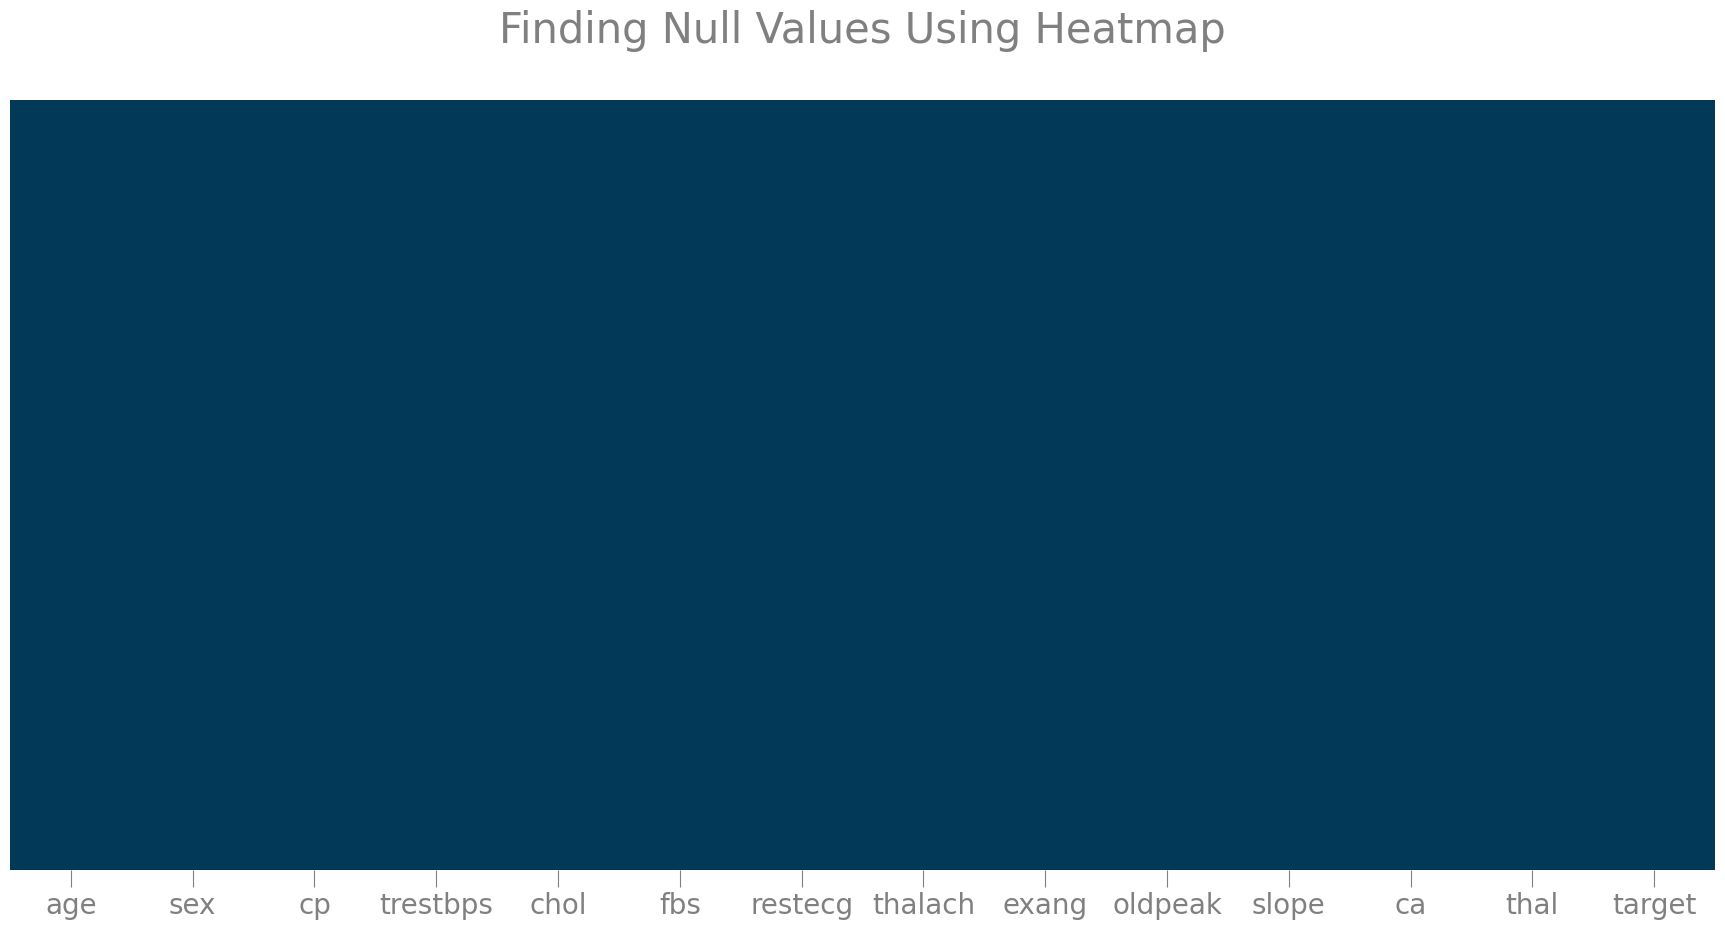

In [11]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [12]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 38.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=6d5c8d60bc7c1982b53eed6a2f3089b227d94a527cf25b485f72ec8c3931dbcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-9vudt3nr/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=bd556c11c10106cfc8d1750ac315725b010090b3c70adcf915279508bde1c44b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


pandas-profiling


In [13]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Analysis
### Feature Selection

#### Univariate selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 13 of the best features from the Dataset.

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column

# Applying SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.06498175 0.05360022 0.12757914 0.06001426 0.0631976  0.02244642
 0.03511818 0.08611814 0.10341664 0.08257227 0.06613356 0.13093937
 0.10388247]


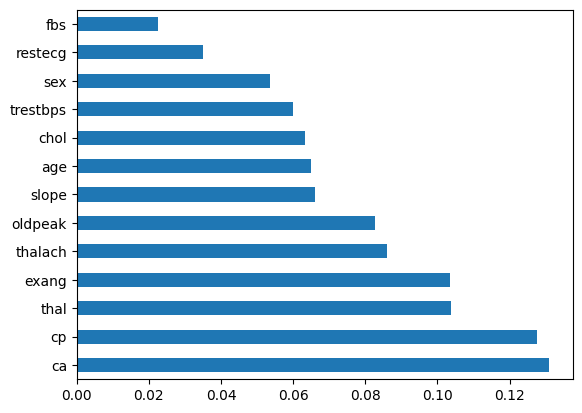

In [15]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

Correlation shows whether the characteristics are related to each other or to the target variable. Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

<Axes: >

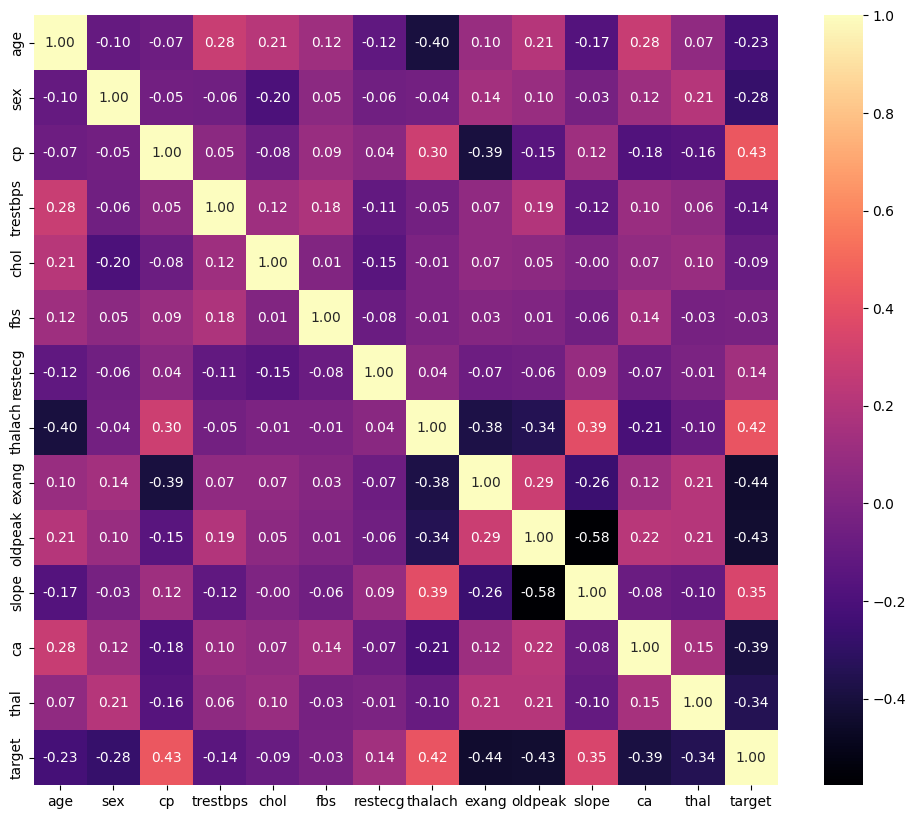

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [17]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


## Data Visualization

Seaborn

In [18]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

Preparing Data

In [19]:
df2 = df.copy()

In [20]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

1. Countplot

In [21]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

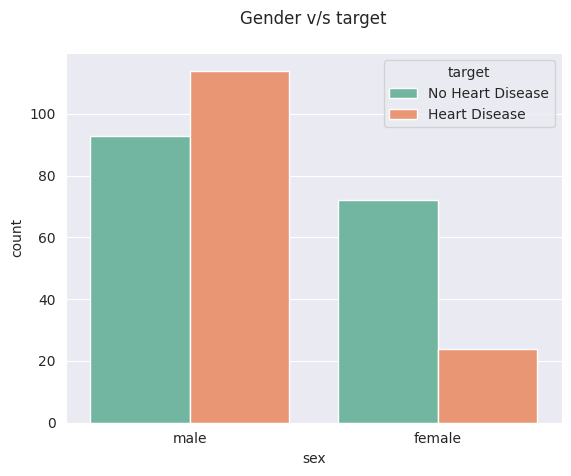

In [22]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men between 70% — 89%. Woman may experience a heart attack with no chest pressure at all, they usually experience nausea or vomiting which are often confused with acid reflux or the flu.

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

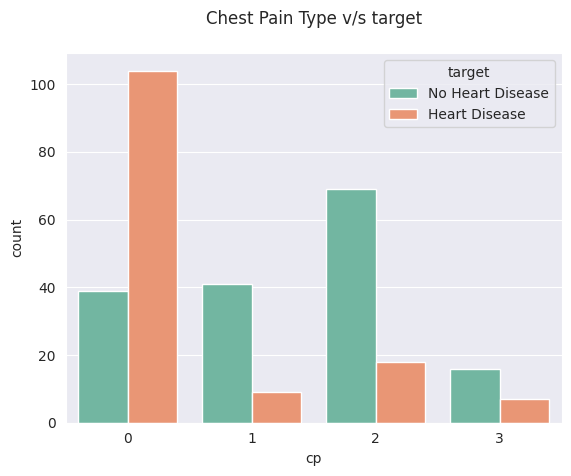

In [23]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. These group of people might show atypical symptoms like indigestion, flu or a strained chest muscle. A asymptomatic attack, like any heart attack, involves, blockage of blood flow to your heart and possible damage to the heart muscle. The risk factors for asymptomatic heart attacks are same as those with heart symptoms. These factors include:

· Age

· Diabetes

· Excess weight

· Family History of Heart Disease

· High Blood Pressure

· High cholesterol

· Lack of exercise

· Prior Heart attack

· Tobacco use

Asymptomatic Heart attack puts you at a greater risk of having another heart attack which could be d deadly. Having another heart attack also increases your risk of complications, such as heart failure. There are no test to determine your potential for asymptomatic heart attack. The only way to tell If you had asymptomatic attack is by an electrocardiogram or echocardiogram. These tests can reveal changes that signal a heart attack.

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


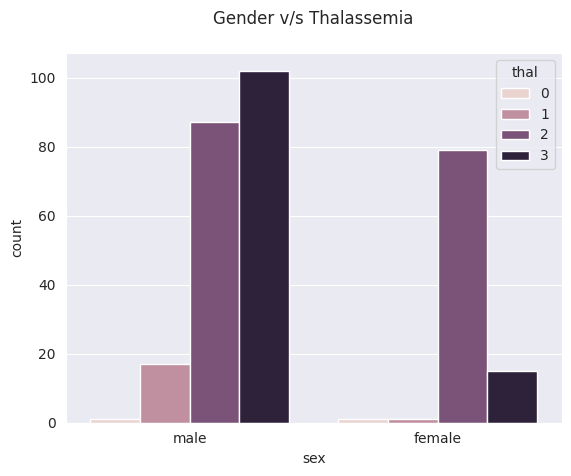

In [24]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type, with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.

Text(0.5, 1.0, 'Slope v/s Target\n')

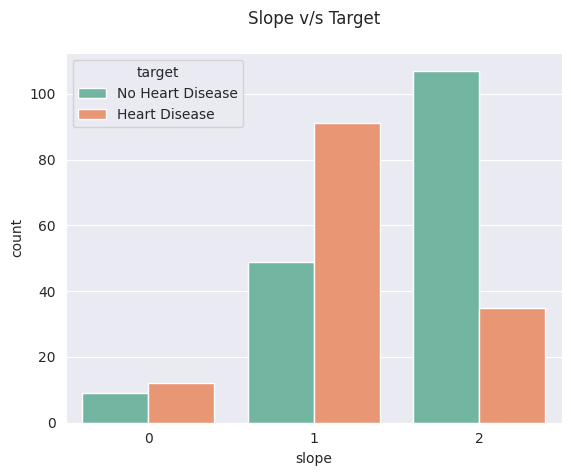

In [25]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

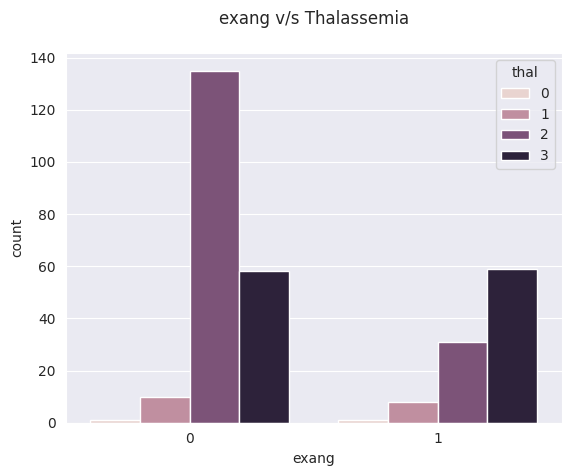

In [26]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

2. Distplot

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

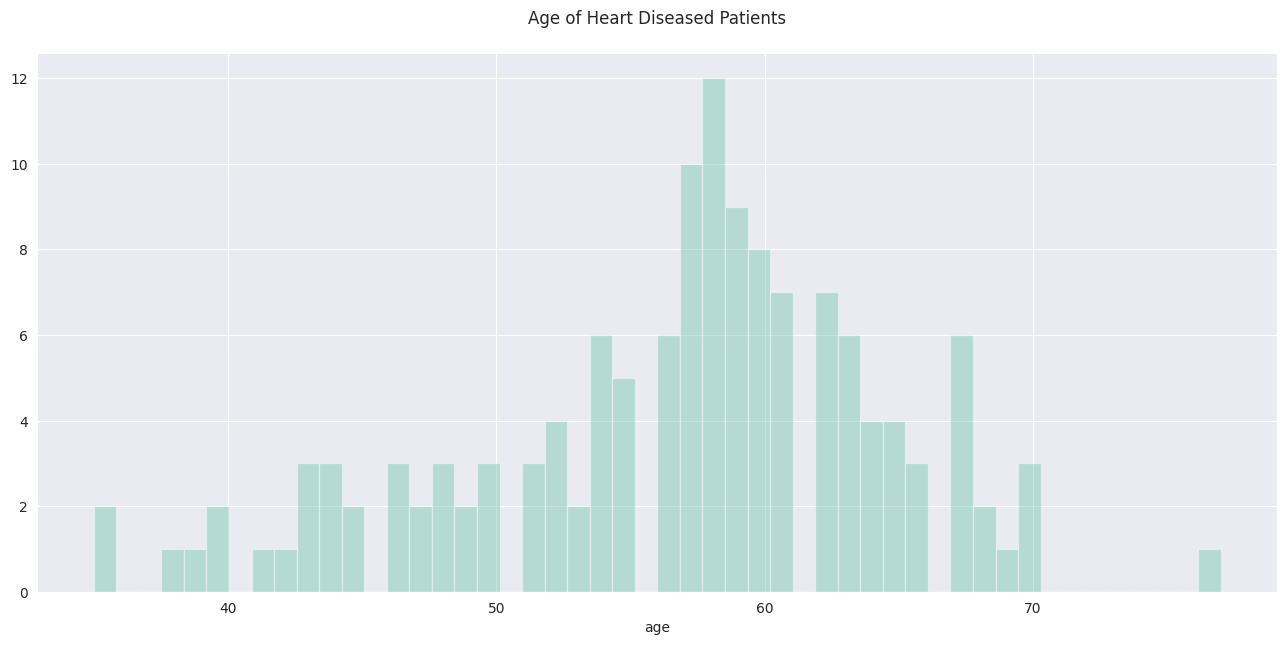

In [27]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

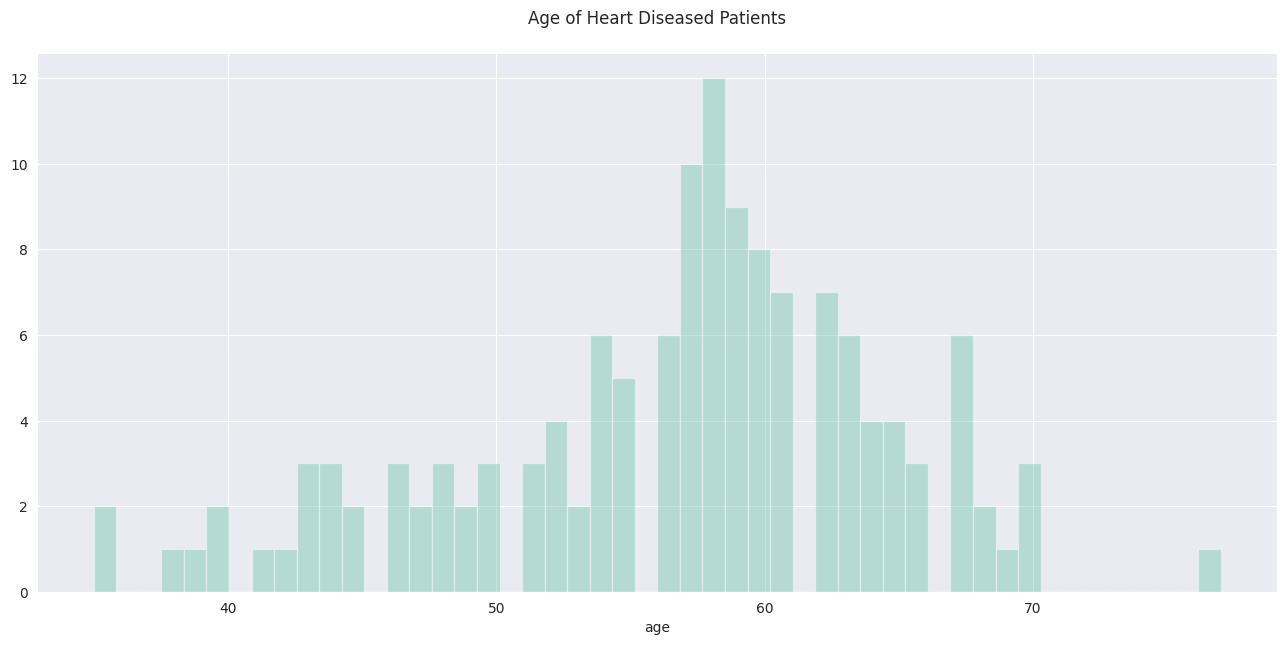

In [28]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

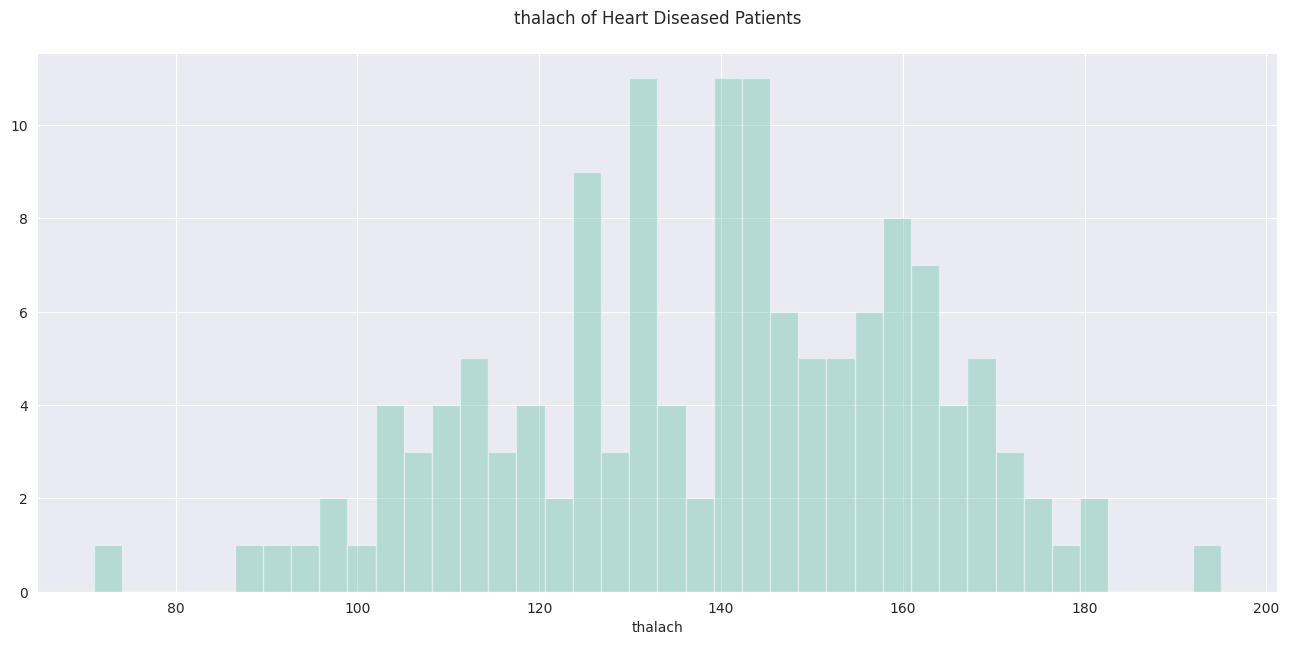

In [29]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

In [30]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


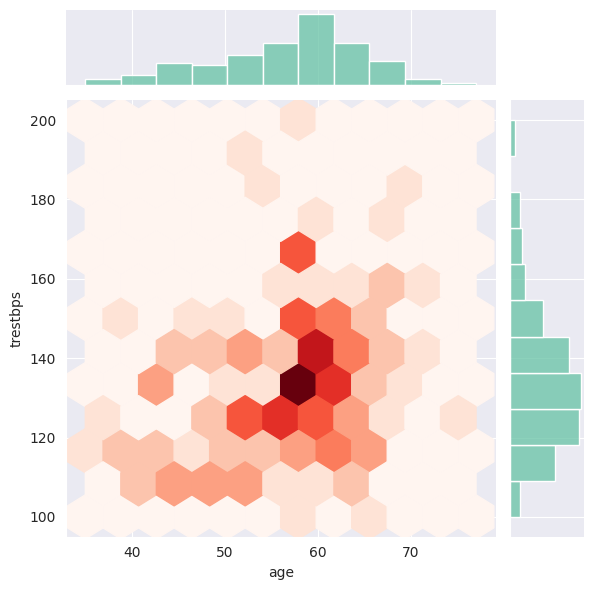

In [31]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'

              )


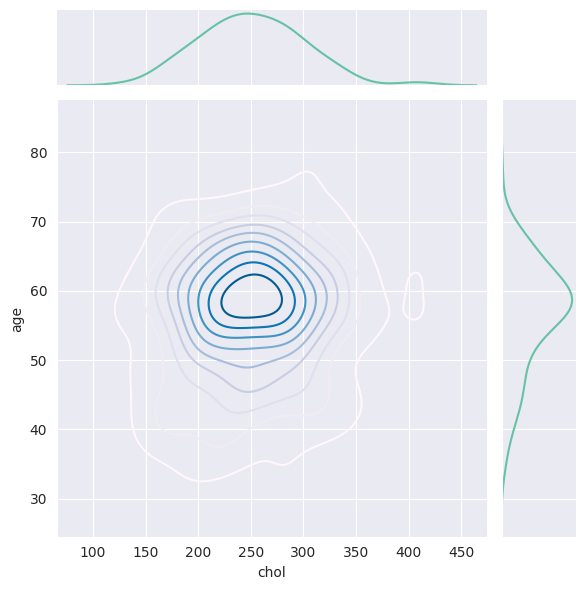

In [32]:


sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


Joint plots in seaborn helps us to understand the trend seen among two features. As observed from the above plot we can see that most of the Heart diseased patients in their age of upper 50s or lower 60s tend to have Cholesterol between 200mg/dl to 300mg/dl.

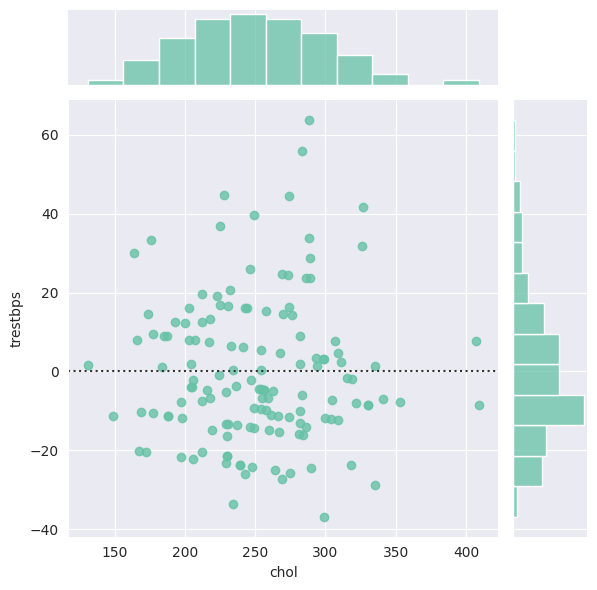

In [33]:

sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',

              )


<Axes: xlabel='target', ylabel='age'>

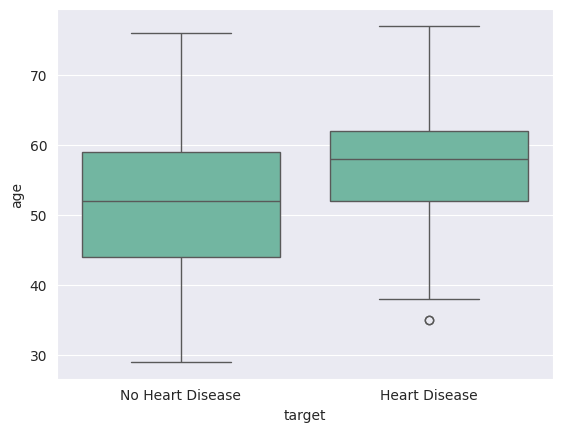

In [34]:
sns.boxplot(data=df2,x='target',y='age')

<Axes: xlabel='ca', ylabel='age'>

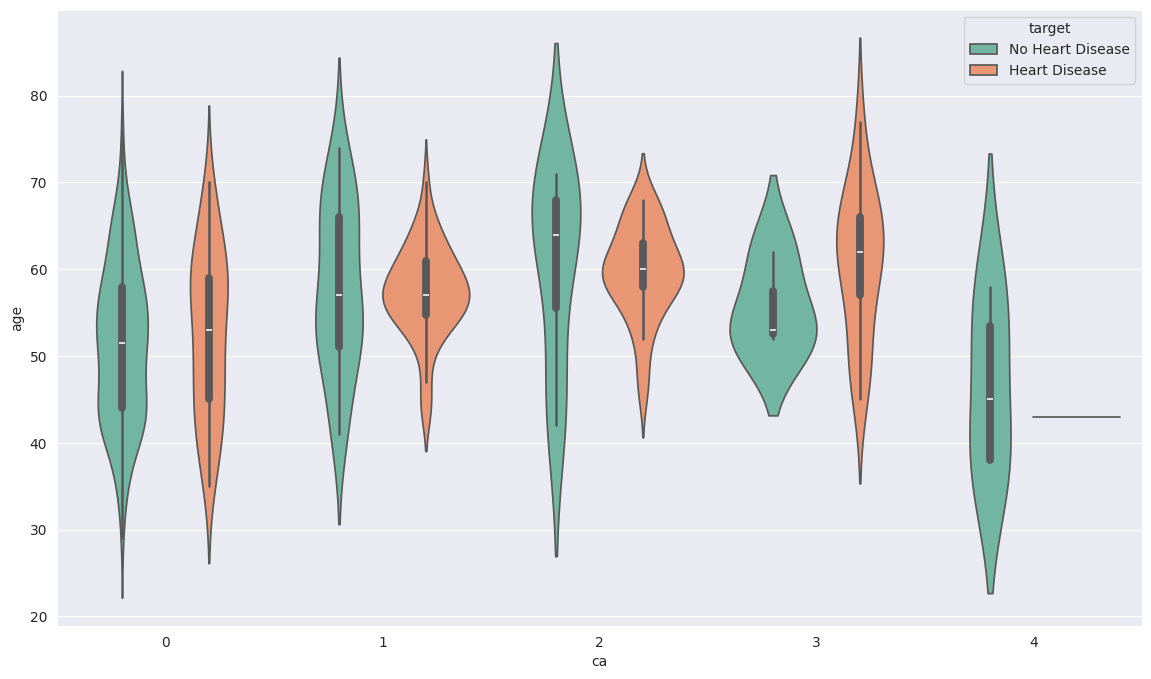

In [35]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df2,x='ca',y='age',hue='target')

<Axes: xlabel='cp', ylabel='thalach'>

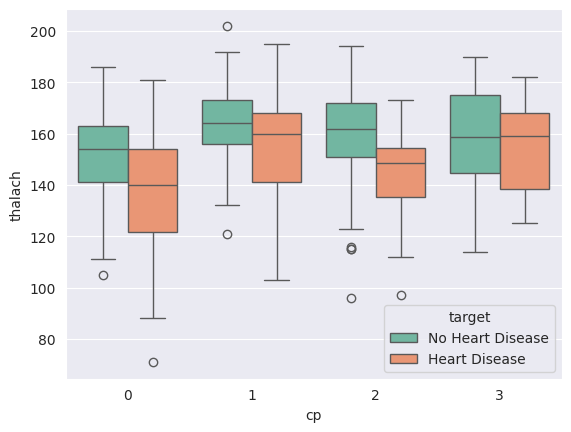

In [36]:
sns.boxplot(data=df2,x='cp',y='thalach',hue='target')

<Axes: xlabel='fbs', ylabel='trestbps'>

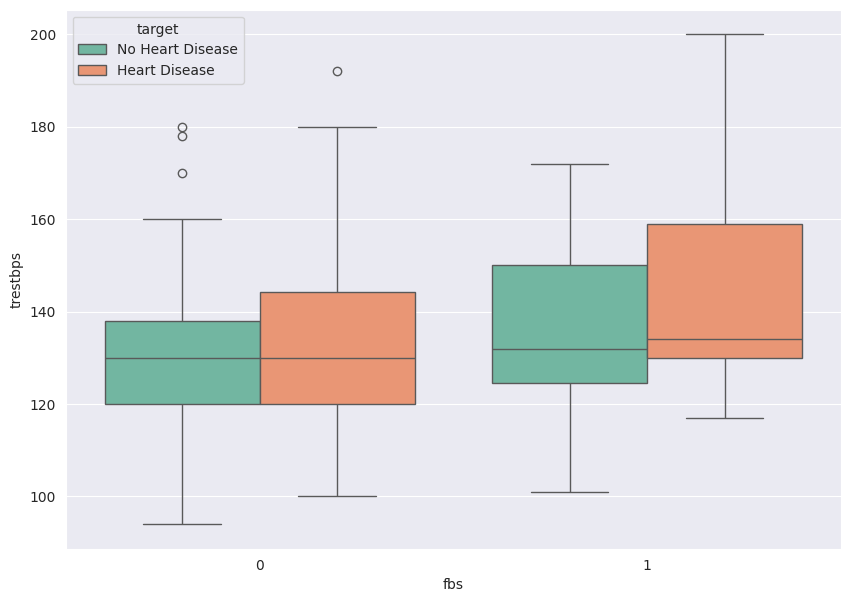

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='fbs',y='trestbps',hue='target')

<Axes: xlabel='exang', ylabel='oldpeak'>

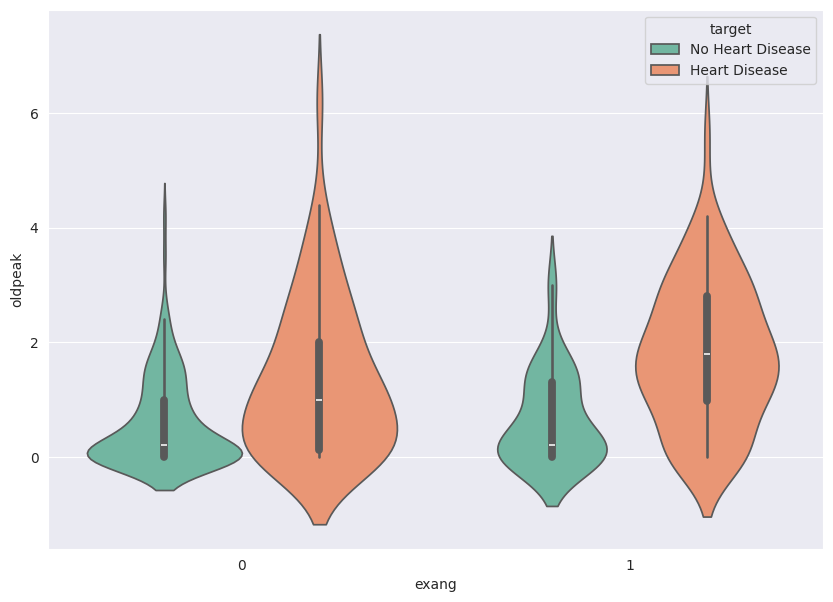

In [38]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df2,x='exang',y='oldpeak',hue='target')

<Axes: xlabel='slope', ylabel='thalach'>

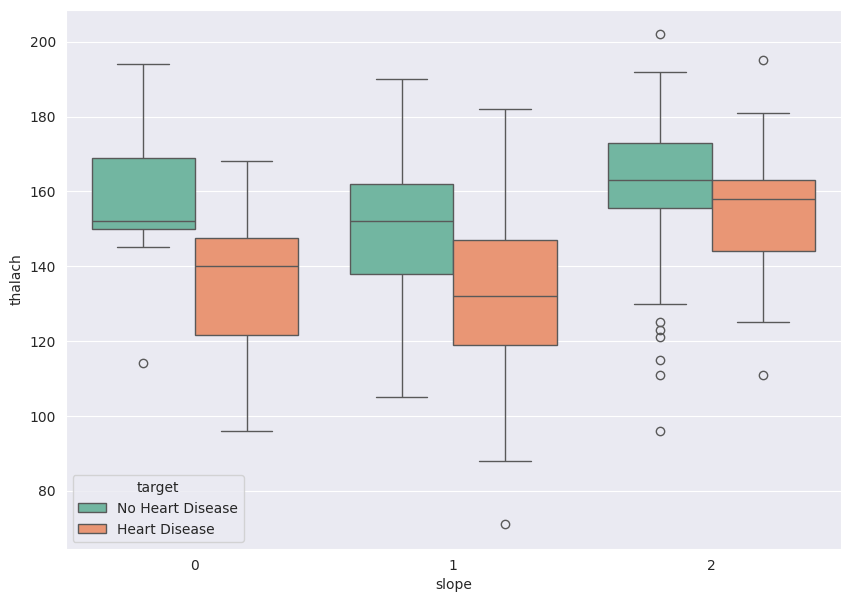

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df2,x='slope',y='thalach',hue='target')

<Axes: xlabel='thal', ylabel='oldpeak'>

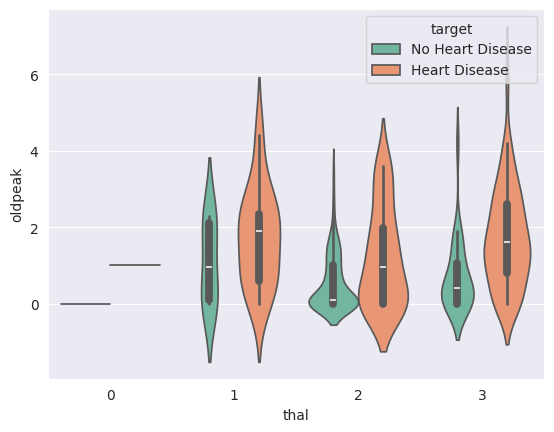

In [40]:
sns.violinplot(data=df2,x='thal',y='oldpeak',hue='target')

<Axes: xlabel='target', ylabel='thalach'>

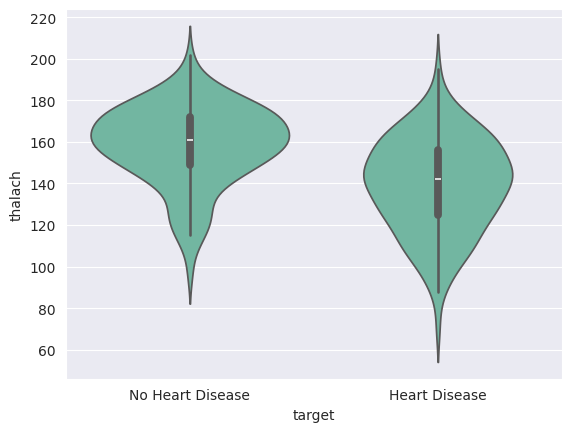

In [41]:
sns.violinplot(data=df2,x='target',y='thalach')

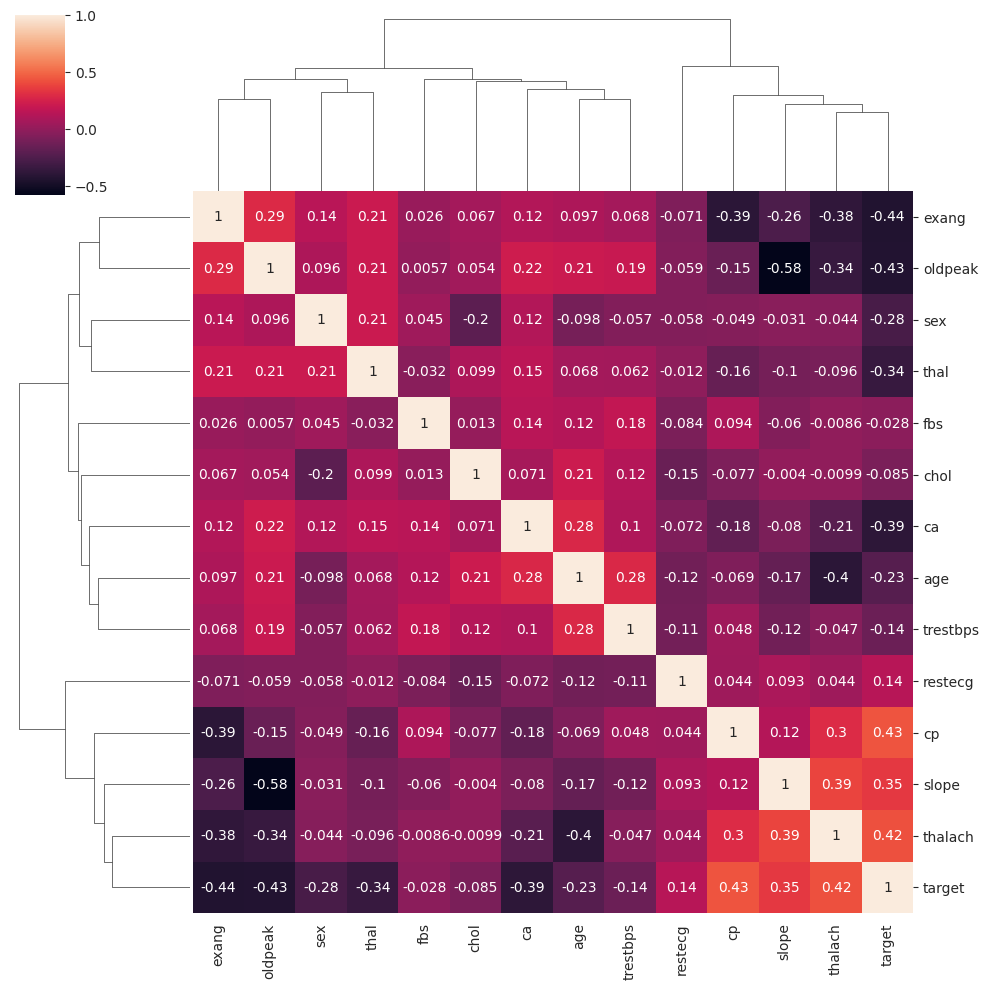

In [42]:
sns.clustermap(df.corr(),annot=True)

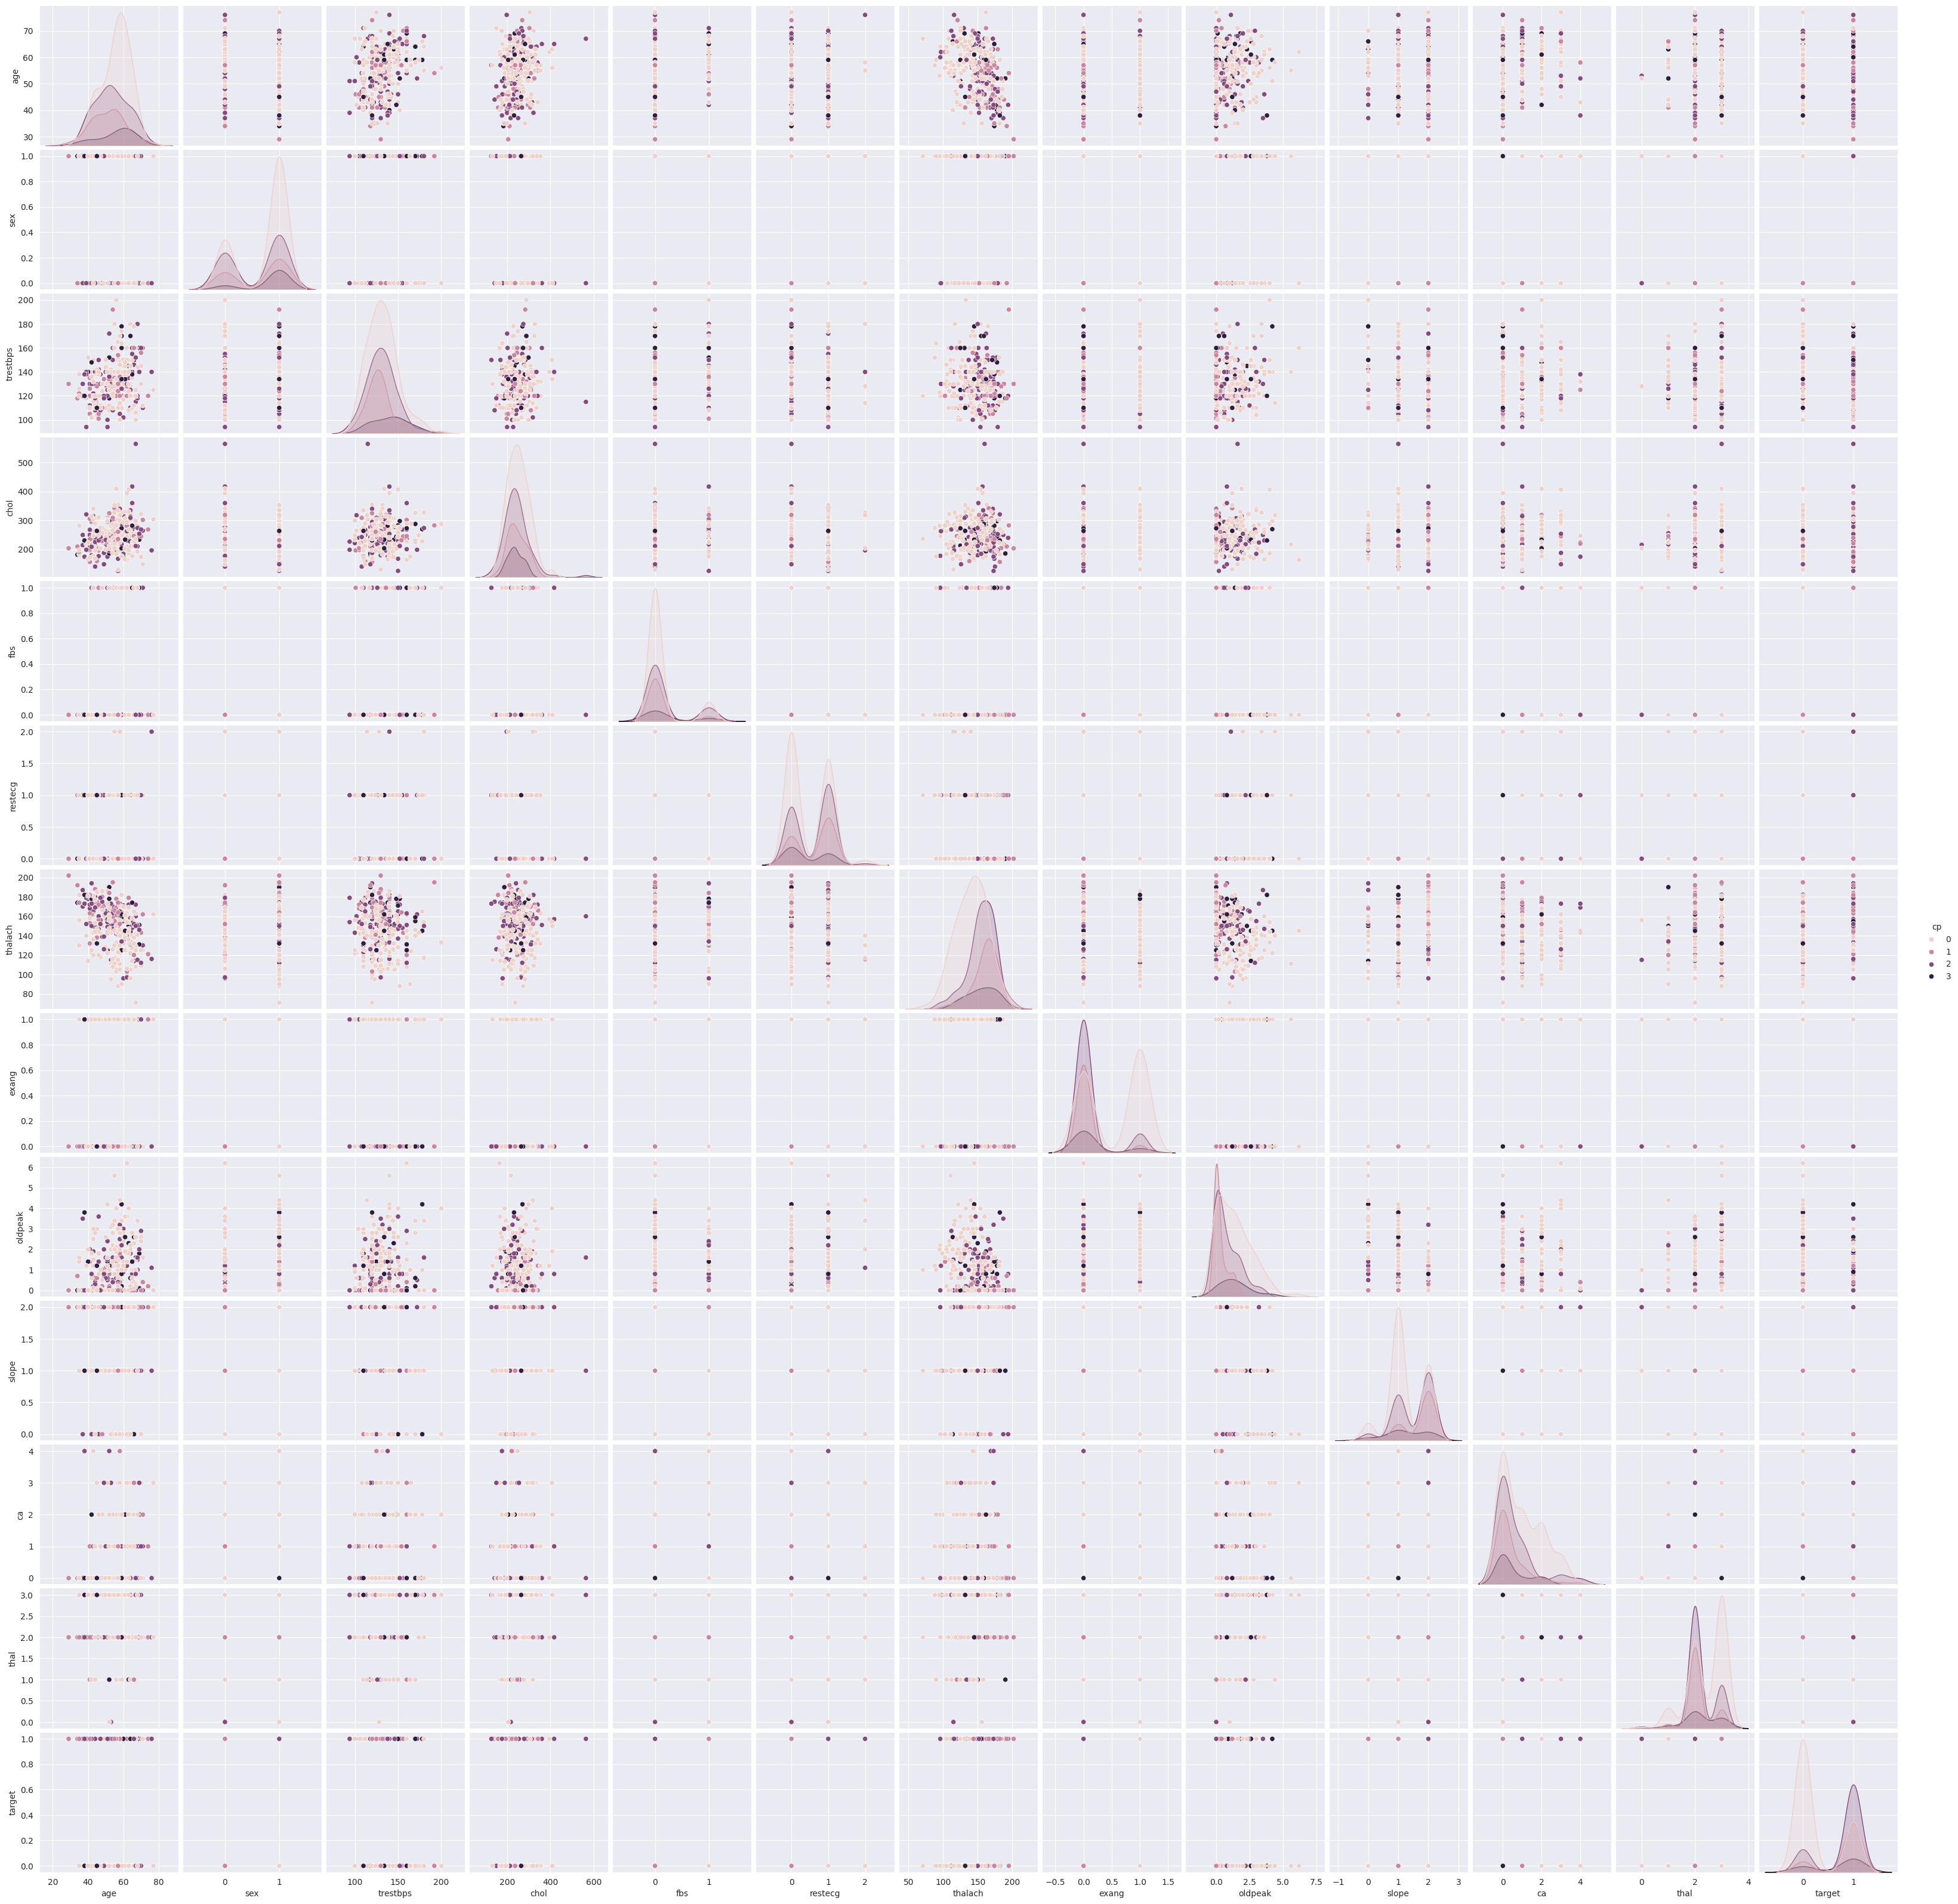

In [43]:
sns.pairplot(df,hue='cp')

## Training and Evaluating Classification Models

The code below trains and evaluates various classification models for predicting heart disease. It performs the following steps:

1. **Data Splitting**: Splits the data into features (X) and target (y).

2. **Handling Imbalanced Data**: Handles imbalanced data using the SMOTE (Synthetic Minority Over-sampling Technique) oversampling technique.

3. **Feature Scaling**: Standardizes the features using StandardScaler to have zero mean and unit variance.

4. **Feature Selection**: Performs feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) to eliminate redundant or irrelevant features and improve model performance.

5. **Model Training and Tuning**: Trains and tunes the following classification models:
    - **Decision Tree Classifier**
    - **Random Forest Classifier**
    - **Logistic Regression**
    - **Support Vector Classifier (SVC)**
    - **Voting Classifier** (ensemble of Logistic Regression and SVC)
    - **Logistic Regression with class weight adjustment**
    - **SVC with class weight adjustment**

6. **Model Evaluation**: Evaluates the performance of each model using:
    - **Classification Report**: Provides precision, recall, and f1-score for each class.
    - **ROC AUC Score**: Calculates the Area Under the Receiver Operating Characteristic (ROC) curve, if available.
    - **Average Precision Score**: Computes the average precision score, if available.
    - **F1-Score**: Calculates the overall F1-score.

The goal is to find the best-performing model(s) for predicting heart disease based on the given dataset.

In [44]:
def train_and_evaluate_models(df):
    """
    Args:
        df (pandas.DataFrame): DataFrame containing the heart disease dataset.

    Returns:
        None
    """

    # Split data into features and target
    X = df.drop('target', axis=1).values
    y = df['target'].values

    # Handle imbalanced data with SMOTE
    # SMOTE oversamples the minority class to balance the dataset
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Feature scaling
    # Standardize features to have zero mean and unit variance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    # Feature selection with Recursive Feature Elimination
    # Eliminate redundant or irrelevant features to improve model performance
    rfecv = RFECV(estimator=RandomForestClassifier(random_state=42), step=1, cv=StratifiedKFold(5), scoring='roc_auc')
    rfecv.fit(X_scaled, y_resampled)
    X_selected = rfecv.transform(X_scaled)
    print(f"Optimal number of features: {rfecv.n_features_}")

    # Decision Tree Classifier
    # Train and tune a Decision Tree Classifier model
    dt_params = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
    dt_best = dt_grid.fit(X_selected, y_resampled).best_estimator_

    # Random Forest Classifier
    # Train and tune a Random Forest Classifier model
    rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
    rf_rand = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_iter=20, random_state=42)
    rf_best = rf_rand.fit(X_selected, y_resampled).best_estimator_

    # Logistic Regression
    # Train and tune a Logistic Regression model
    lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}
    lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5, scoring='roc_auc')
    lr_best = lr_grid.fit(X_selected, y_resampled).best_estimator_

    # SVC
    # Train and tune a Support Vector Classifier (SVC) model
    svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
    svc_rand = RandomizedSearchCV(SVC(random_state=42, probability=True), svc_params, cv=5, scoring='roc_auc', n_iter=20, random_state=42)
    svc_best = svc_rand.fit(X_selected, y_resampled).best_estimator_

    # Ensemble model (Voting Classifier)
    # Combine Logistic Regression and SVC models in a Voting Classifier ensemble
    voting_clf = VotingClassifier(estimators=[('lr', lr_best), ('svc', svc_best)], voting='soft')

    # Class weight adjustment
    # Adjust class weights to handle imbalanced data for Logistic Regression and SVC
    lr_weighted = make_pipeline(RandomUnderSampler(random_state=42), LogisticRegression(class_weight='balanced', random_state=42))
    svc_weighted = make_pipeline(RandomUnderSampler(random_state=42), SVC(class_weight='balanced', probability=True, random_state=42))

    # Train and evaluate models
    models = [dt_best, rf_best, lr_best, svc_best, voting_clf, lr_weighted, svc_weighted]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

    # Evaluate models
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n{model.__class__.__name__} Performance:")
        print(classification_report(y_test, y_pred))
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
            print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")
            print(f"Average Precision: {average_precision_score(y_test, y_proba):.3f}")
        elif hasattr(model, 'decision_function'):
            y_score = model.decision_function(X_test)
            print(f"ROC AUC Score: {roc_auc_score(y_test, y_score):.3f}")
            print(f"Average Precision: {average_precision_score(y_test, y_score):.3f}")
        else:
            print("ROC AUC Score and Average Precision not available for this model.")
        print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")

        rf_best.fit(X_selected, y_resampled)

    return rf_best
if __name__ == "__main__":
    train_and_evaluate_models(df)

Optimal number of features: 13

DecisionTreeClassifier Performance:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.72      0.82      0.77        34

    accuracy                           0.74        66
   macro avg       0.75      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66

ROC AUC Score: 0.775
Average Precision: 0.710
F1-Score: 0.767

RandomForestClassifier Performance:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66

ROC AUC Score: 0.879
Average Precision: 0.871
F1-Score: 0.845

LogisticRegression Performance:
              precision    recall  f1-score   support

           0       0.86      

## Model Selection

**Based on the evaluation metrics, I'm choosing to move forward with the random forest classifier due to the following reasons: I achieved the highest accuracy of 0.83 among all the models with the random forest classifier.
It also had the highest ROC AUC score of 0.879 and the highest F1-score of 0.845.
Random Forest Classifiers are generally robust to outliers and can handle non-linear relationships between features and the target variable.
They are also less prone to overfitting compared to the other models, like Decision Trees**

In [46]:
def train_and_save_model(df):
    """
    This function trains a Random Forest Classifier model for predicting heart disease
    and saves the trained model, scaler, and feature names to disk.

    Args:
        df (pandas.DataFrame): DataFrame containing the heart disease dataset.

    Returns:
        None
    """

    # Split data into features and target
    X = df.drop('target', axis=1)
    y = df['target']

    # Handle imbalanced data with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    # Random Forest Classifier
    rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
    rf_rand = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_iter=20, random_state=42)
    rf_best = rf_rand.fit(X_selected, y_resampled)

    # Save the trained model, scaler, and feature names
    joblib.dump(rf_best.best_estimator_, 'random_forest_model.joblib')
    joblib.dump(scaler, 'scaler.joblib')
    feature_names = X.columns.tolist()
    joblib.dump(feature_names, 'feature_names.joblib')

if __name__ == "__main__":
    # Load the dataset
    df = pd.read_csv('/content/heart.csv')

    # Train and save the model, scaler, and feature names
    train_and_save_model(df)

NameError: name 'X_selected' is not defined

## Deployment

In [ ]:
inference_script = """

class ModelHandler(object):
    def __init__(self):
        self.model = joblib.load('random_forest_model.joblib')
        self.scaler = joblib.load('scaler.joblib')
        self.feature_names = joblib.load('feature_names.joblib')

    def preprocess(self, input_data: dict) -> np.ndarray:
        try:
            input_data = pd.DataFrame(input_data, columns=self.feature_names)
            input_data = self.scaler.transform(input_data)
            return input_data
        except Exception as e:
            raise ValueError("Error preprocessing data: {}".format(str(e)))

    def predict(self, input_data: dict) -> np.ndarray:
        try:
            input_data = self.preprocess(input_data)
            predictions = self.model.predict(input_data)
            return predictions
        except Exception as e:
            raise ValueError("Error making predictions: {}".format(str(e)))

def lambda_handler(event: dict, context: object) -> dict:
    try:
        if 'input_data' not in event:
            raise ValueError("Input data is missing")

        model_handler = ModelHandler()
        input_data = event['input_data']
        predictions = model_handler.predict(input_data)
        return {'predictions': predictions.tolist()}
    except Exception as e:
        raise ValueError("Error processing request: {}".format(str(e)))

"""

with open('inference.py', 'w') as f:
    f.write(inference_script)

print("Model training and saving completed.")

In [ ]:
pip install fastapi uvicorn nest-asyncio ngrok pyngrok

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
import nest_asyncio
import uvicorn

# Apply nest_asyncio to allow running Uvicorn in Jupyter
nest_asyncio.apply()

# Load the trained model
model = joblib.load('random_forest_model.joblib')

# Initialize the FastAPI app
app = FastAPI(
    title="Heart Disease Prediction API",
    description="An API for predicting heart disease based on medical parameters.",
    version="1.0.0",
    contact={
        "name": "Buoy Gai",
        "email": "b.joak@alustudent.com",
    },
    license_info={
        "name": "MIT License",
        "url": "https://opensource.org/licenses/MIT",
    },
)

# Define the request body structure
class HeartDiseaseRequest(BaseModel):
    age: int
    sex: int
    cp: int
    trestbps: int
    chol: int
    fbs: int
    restecg: int
    thalach: int
    exang: int
    oldpeak: float
    slope: int
    ca: int


# Define the prediction endpoint
@app.post("/predict", tags=["Prediction"], summary="Predict Heart Disease", description="Predict if a patient has heart disease based on medical parameters.")
def predict(data: HeartDiseaseRequest):
    """
    Predict heart disease using the following parameters:
    - **age**: Age of the patient
    - **sex**: Sex of the patient (1 = male; 0 = female)
    - **cp**: Chest pain type (0-3)
    - **trestbps**: Resting blood pressure (in mm Hg)
    - **chol**: Serum cholesterol in mg/dl
    - **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    - **restecg**: Resting electrocardiographic results (0-2)
    - **thalach**: Maximum heart rate achieved
    - **exang**: Exercise induced angina (1 = yes; 0 = no)
    - **oldpeak**: ST depression induced by exercise relative to rest
    - **slope**: The slope of the peak exercise ST segment (0-2)
    - **ca**: Number of major vessels (0-3) colored by fluoroscopy
    """
    # Convert request data to DataFrame
    df = pd.DataFrame([data.dict().values()], columns=data.dict().keys())

    # Make prediction
    prediction = model.predict(df)[0]

    # Return the prediction result
    return {"prediction": int(prediction)}

from pyngrok import ngrok, conf
if __name__ == "__main__":

    conf.get_default().auth_token = "2gmt47MwYXT06IgYgR2yZwoDRhj_dpWBaJLhkbspC1HKVXHU"

    # Create an ngrok tunnel for port 8000
    ngrok_tunnel = ngrok.connect(8000)
    public_url = ngrok_tunnel.public_url
    print(f"Public URL: {public_url}")

    config = uvicorn.Config(app, host="0.0.0.0", port=8000)
    server = uvicorn.Server(config)
    server.run()